In [13]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('winequalityN.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
df.shape

(6497, 13)

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [18]:
# Number of missing values in each column of training data
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64


In [28]:
df.fillna(df.mode().iloc[0], inplace=True)


In [29]:
#show all type of winery
df['type'].unique()

array(['white', 'red'], dtype=object)

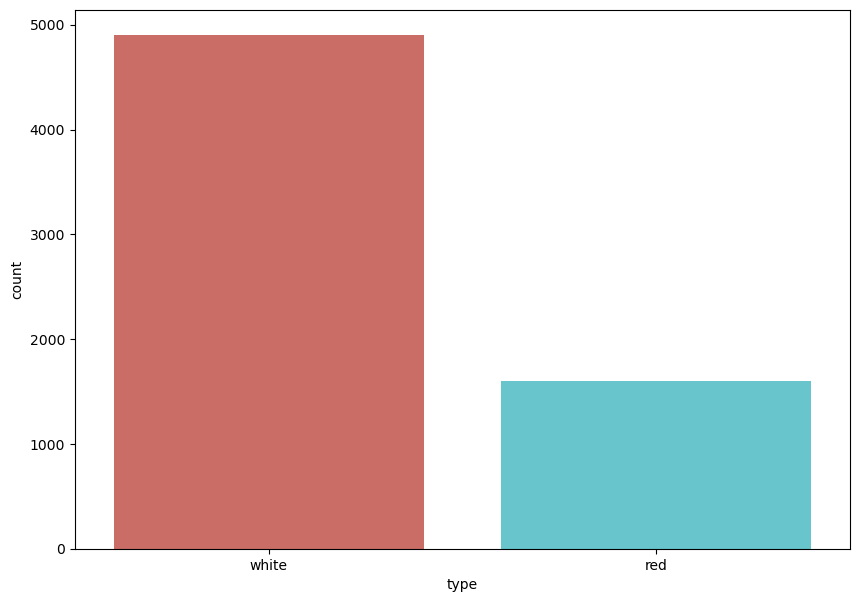

In [30]:
# plot histogram of type
plt.figure(figsize=(10,7))
sns.countplot(x='type', data=df, palette='hls')
plt.show()

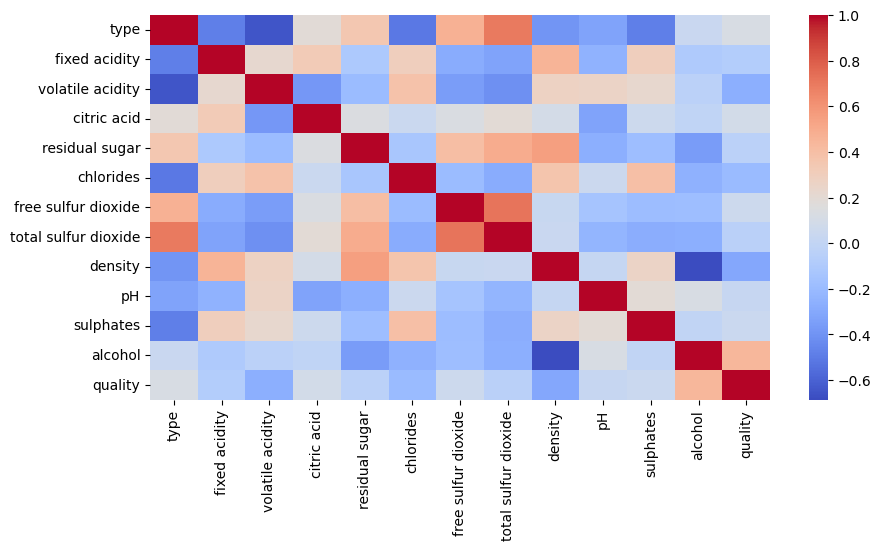

In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert 'type' column to numeric
df['type'] = label_encoder.fit_transform(df['type'].astype(str))

# Now, you can compute the correlation
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


<Axes: xlabel='quality', ylabel='count'>

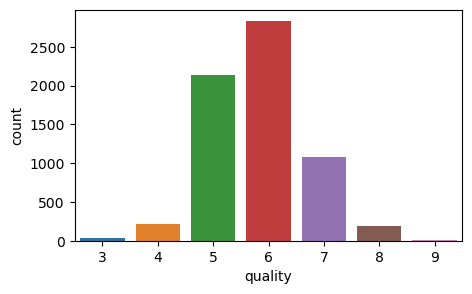

In [32]:
#ploting countplot quality 
plt.figure(figsize=(5,3))
sns.countplot(x='quality',data=df)

In [33]:
#converting categorical to numerical
df['type']=pd.get_dummies(df['type'],drop_first=True)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,True,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,True,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,True,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,True,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,True,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [34]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('quality',axis=1))

StandardScaler()

In [35]:
# start with modelling
# split data into train and test
from sklearn.model_selection import train_test_split
X=df.drop('quality',axis=1)
y=df['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [36]:
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
#acurracy
lr=lr.score(X_test,y_test)

In [37]:
#svm
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm=svm.score(X_test,y_test)

In [38]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf=rf.score(X_test,y_test)

In [39]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn=knn.score(X_test,y_test)

In [40]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt=dt.score(X_test,y_test)

In [41]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb=nb.score(X_test,y_test)

In [42]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'SVM', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [lr,knn,svm,rf,nb,dt]})

In [43]:
# show all the models 
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.688205
5,Decision Tree,0.576410
1,KNN,0.474359
2,SVM,0.443077
4,Naive Bayes,0.400000
0,Linear Regression,0.301933


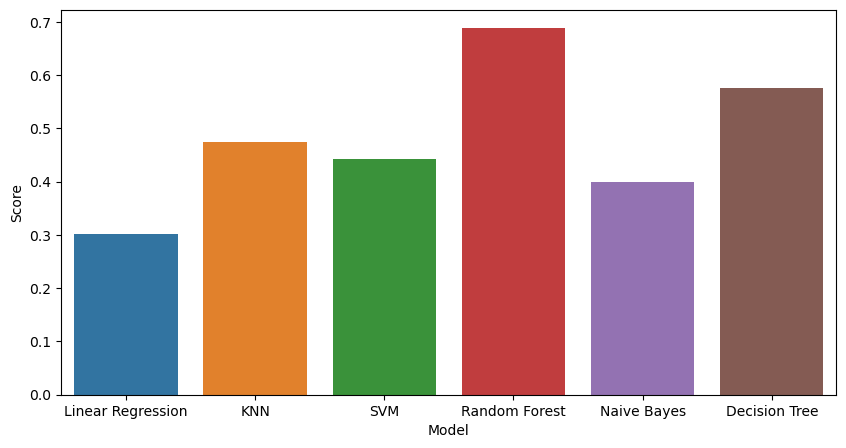

In [44]:
#plotting the graph 
plt.figure(figsize=(10,5))
sns.barplot(x='Model',y='Score',data=models)
plt.show()